# Python Day 2 

## Goals for Today

There are three main goals for today's lecture:

1. Getting comfortable with making, manipulating, and visualizing NumPy arrays. 
2. Building the habit of searching for and reading [code documentation](https://numpy.org/doc/stable/reference/).
3. Breaking down complex programming challenges step-by-step and using pseudo-code.

## Section 1: Importing Libraries
If vanilla python seems rather lackluster, that's because it is. Fortunately, the python scientific stack adds a broad and powerful array of python packages to fill in the gaps. Once installed, python packages are easily loaded in for use.

In [2]:
import numpy as np
print(np.__version__)

1.18.1


Commands from packages are like attributes of objects. Many libraries also have submodules, or clusters of related functions.

In [3]:
np.linalg
np.random

<module 'numpy.random' from '/opt/anaconda3/lib/python3.7/site-packages/numpy/random/__init__.py'>

## Section 2: NumPy Array Basics

NumPy arrays have many built-in attributes that make them very convenient to use.

In [4]:
np.random.seed(47404)

## Generate arbitrary array.
x = np.random.randint(0,9,(3,3,2))

With ipython environments, if you cannot remember the functions available you can make use of **tab-complete**.

In [8]:
## Try out tab-complete.
x

array([[[0, 2],
        [0, 2],
        [4, 3]],

       [[4, 6],
        [5, 2],
        [8, 3]],

       [[6, 8],
        [7, 1],
        [0, 3]]])

The following attributes help you keep track of the most important pieces of metadata.

In [9]:
print(x.shape)    # shape: dimensions of array
print(x.ndim)     # ndim:  number of dimensions of array
print(x.size)     # size:  number of elements in array
print(x.dtype)    # dtype: data type of elements

(3, 3, 2)
3
18
int64


Changing the dtype of an array is easy!

In [10]:
x.astype(int);         # change to int
x.astype(str);         # change to string
x.astype(float);       # change to float (default)
x.astype(np.float16);  # change to float16

Many useful functions are built-in to NumPy arrays.

In [ ]:
print('Min:', x.min())      # Get max of array.
print('Max:', x.max())      # Get min of array.
print('Sum:', x.sum())      # Get sum of array.
print('Mean:',x.mean())     # Get mean of array.

One of the most crucial functions is `copy`.

In [11]:
y = x.copy()
x[:] = 0
y

array([[[0, 2],
        [0, 2],
        [4, 3]],

       [[4, 6],
        [5, 2],
        [8, 3]],

       [[6, 8],
        [7, 1],
        [0, 3]]])

### Mini-exercise

a) Look up `np.linspace`. How does it differ from `np.arange`? 

In [20]:
test1 = np.linspace(0,3).round(2)
test2 = np.arange(0,3)

print(test1)
print(test2)

[0.   0.06 0.12 0.18 0.24 0.31 0.37 0.43 0.49 0.55 0.61 0.67 0.73 0.8
 0.86 0.92 0.98 1.04 1.1  1.16 1.22 1.29 1.35 1.41 1.47 1.53 1.59 1.65
 1.71 1.78 1.84 1.9  1.96 2.02 2.08 2.14 2.2  2.27 2.33 2.39 2.45 2.51
 2.57 2.63 2.69 2.76 2.82 2.88 2.94 3.  ]
[0 1 2]


b) Using `np.linspace`, make an evenly-spaced array, 21 elements long, spanning from -1 to 1. Confirm it's length = 21.

In [23]:
w = np.linspace(-1,1,num=21)

print(w,len(w))

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ] 21


c) Compute the standard deviation of the array. (Hint: this is a built-in attribute.)

In [28]:
np.std(w)

0.6055300708194984

d) Compute the 40% percentile of the array. (Hint: this is *not* a built-in attribute.)

e) Convert the elements to type `int`. What happens?

## Section 3: Axis Operations

### Built-in operations

In [29]:
np.random.seed(47404)

## Generate arbitrary matrix.
X = np.linspace(0,5,16).reshape(4,4).round(2)
print(X)

[[0.   0.33 0.67 1.  ]
 [1.33 1.67 2.   2.33]
 [2.67 3.   3.33 3.67]
 [4.   4.33 4.67 5.  ]]


Unless otherwise specified, built-in operations will be applied element-wise (e.g. round) or across the entire array.

In [30]:
print( X.sum() )

40.0


However, we can modify along which dimension an operation is applied using the `axis` flag. Below we sum across the first dimension.

In [31]:
## Sum across the first axis.
print( X.sum(axis=0) )

[ 8.    9.33 10.67 12.  ]


Now we sum across the second dimension.

In [32]:
## Sum across the second axis.
print( X.sum(axis=1) )

[ 2.    7.33 12.67 18.  ]


### Detour: defining functions

In scientific programming, one of the most important skills is to be able to write your own functions. Let's pause for a moment to review **function definition** in python. Below we write a simple function that scales a 1d-array in the range [min, max].

In [33]:
def minmax_scale(arr, feature_range=(0,1)):
    """Scale array to given range.
    
    Parameters
    ----------
    arr : 1d array
        The data to scale.
    feature_range : tuple (min, max), default=(0, 1)
        Desired range of transformed data.
        
    Returns
    -------
    arr_scale : 1d array
        Transformed array.
    """
    
    ## Error-catching.
    arr = np.array(arr)
    
    ## Scale between [0,1].
    arr_scale = (arr - arr.min()) / (arr.max() - arr.min())
    
    ## Scale between [min,max].
    a, b = feature_range
    arr_scale = arr_scale * (b - a) + a
    
    return arr_scale

Let's confirm our function works. As above, when applied without specifying an axis, the function will be applied across the entire matrix.

In [34]:
X_scale = minmax_scale(X)
print(X, end='\n\n')
print(X_scale.round(2))

[[0.   0.33 0.67 1.  ]
 [1.33 1.67 2.   2.33]
 [2.67 3.   3.33 3.67]
 [4.   4.33 4.67 5.  ]]

[[0.   0.07 0.13 0.2 ]
 [0.27 0.33 0.4  0.47]
 [0.53 0.6  0.67 0.73]
 [0.8  0.87 0.93 1.  ]]


### Apply along axis 

When a function is not a built-in operation, we can use `np.apply_along_axis` to apply arbitrary functions along each dimension of an array. We apply our new function across the first dimension (across each column) below.

In [35]:
## Apply across columns.
X_scale = np.apply_along_axis(minmax_scale, 0, X)
print(X_scale)

[[0.     0.     0.     0.    ]
 [0.3325 0.335  0.3325 0.3325]
 [0.6675 0.6675 0.665  0.6675]
 [1.     1.     1.     1.    ]]


We apply our new function across the second dimension (across each row) below.

In [36]:
## Apply across rows.
X_scale = np.apply_along_axis(minmax_scale, 1, X)
print(X_scale)

[[0.   0.33 0.67 1.  ]
 [0.   0.34 0.67 1.  ]
 [0.   0.33 0.66 1.  ]
 [0.   0.33 0.67 1.  ]]


### Mini-exercise

a) Find the index (position) of the *largest* element for each row.

In [47]:
print(X)
np.apply_along_axis(np.argmax, 0, X)
np.argmin(X,axis=0)

[[0.   0.33 0.67 1.  ]
 [1.33 1.67 2.   2.33]
 [2.67 3.   3.33 3.67]
 [4.   4.33 4.67 5.  ]]


array([0, 0, 0, 0])

b) Find the index (position) of the *smallest* element for each column.

In [46]:
np.apply_along_axis(np.argmin, 1, X)
np.argmin(X,axis=1)

array([0, 0, 0, 0])

c) How would you make sure you applied `minmax_scale` to the right axis?

## Section 4: Manipulating Arrays 

### Shaping Arrays

Importantly, all NumPy arrays and matrices have a `reshape` attribute allowing for transforming matrices into different dimensions.

In [49]:
## Make new array.
x = np.arange(24)

## Reshape array.
X = x.reshape(24,1);      # col vector
X = x.reshape(1,24);      # row vector
X = x.reshape(6,4);       # 2d array
X = x.reshape(4,3,2);     # 3d array

One nice feature of NumPy is that it allows for intelligent reshaping. If you specify `-1`, it will determine the size of a remaining dimension based on all others.

In [50]:
X = x.reshape(3,-1,2)
print(X.shape)

(3, 4, 2)


In addition to `reshape`, there are a handful of other functions available for manipulating the dimensions of an array.

Transpose, `T`, will flip a matrix along its diagonal 

In [51]:
print(X.shape)
print(X.T.shape)

(3, 4, 2)
(2, 4, 3)


`swapaxes` allows you to reorder two axes of an array.

In [52]:
print(X.shape)
print(X.swapaxes(0,1).shape)

(3, 4, 2)
(4, 3, 2)


`rollaxis` allows you to shift all axes of an array. 

In [53]:
np.rollaxis(X,1).shape

(4, 3, 2)

`flatten` allows you to compress an N-d array to a 1-d array.

In [54]:
X.flatten().shape

(24,)

### Joining Arrays

Assuming they have similar shapes & dtypes, NumPy arrays are easily joined. In general, the syntax is to pass a list of arrays to a joining function. 

In [55]:
## Initialize array.
x = np.arange(10).reshape(5,2)
print(x)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


The simplest (silliest) merging approach is to use `np.array` to concatenate two arrays along the first axis. 

In [56]:
## Join arrays.
X = np.array([x,x])
print(X)
print('shape:', X.shape)

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
shape: (2, 5, 2)


There are other joining functions, differing in how (along which axis) they merge two arrays. Some examples are below:

In [57]:
## Join along first axis.
X = np.concatenate([x,x])
print(X)
print('shape:', X.shape)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
shape: (10, 2)


In [58]:
## Join along rows (same as vstack).
X = np.row_stack([x,x])
print(X)
print('shape:', X.shape)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
shape: (10, 2)


In [59]:
## Join along columns (same as hstack).
X = np.column_stack([x,x])
print(X)
print('shape:', X.shape)

[[0 1 0 1]
 [2 3 2 3]
 [4 5 4 5]
 [6 7 6 7]
 [8 9 8 9]]
shape: (5, 4)


In [60]:
## Join along specified axis.
X = np.concatenate([x,x], axis=0)
print(X)
print('shape:', X.shape)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]
 [0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
shape: (10, 2)


In [61]:
## Join along new axis.
X = np.stack([x,x], axis=0)
print(X)
print('shape:', X.shape)

[[[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]

 [[0 1]
  [2 3]
  [4 5]
  [6 7]
  [8 9]]]
shape: (2, 5, 2)


### Mini-exercise

a) Using a `np.random` function of your choice, make a new array *A* of shape [2,7,4]. Then complete the following steps:
- Make a copy of *A*. Store the copy in a new variable *B*.
- Swap the first and third axes of *B*.
- Flatten *B* into a 1-d array.
- Reshape *B* back into the original dimensions of *A*.

Now compare A and B. Are they in the same order? 

In [77]:
#arr1 = np.array(np.random, 2,7,4)
A = np.arange(56).reshape(2,7,4)
B = np.copy(A)
np.swapaxes(B,1,2)
B.flatten()
B.reshape(2,7,4)
print("A",A)
print("B",B)

A [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]]

 [[28 29 30 31]
  [32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]
  [48 49 50 51]
  [52 53 54 55]]]
B [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]]

 [[28 29 30 31]
  [32 33 34 35]
  [36 37 38 39]
  [40 41 42 43]
  [44 45 46 47]
  [48 49 50 51]
  [52 53 54 55]]]


b) Beginning below with *x*, a random [4,1] array, use various joining functions above until you have *X*, a new matrix of shape [12,3]. The order of the elements of *X* don't matter.

In [ ]:
x = np.random.uniform(size=(4,1))

c) *Y* is a new random variable of shape [1,12,7,3]. Reshape *Y* until you can subtract *X* from it. In other words, reshape this new variable until you can execute: ```Y - X```.

In [ ]:
Y = np.random.normal(size=(1,12,7,3))

## Section 5: Indexing, Masking, and Assignments

NumPy supports a great many ways of indexing.

In [78]:
np.random.seed(47404)

## Construct an arbitrary matrix.
X = np.random.randint(0, 10, (6,6))
print(X)

[[9 0 2 0 2 4]
 [3 4 6 5 2 9]
 [8 3 9 6 8 7]
 [1 0 3 3 6 7]
 [1 3 3 3 8 3]
 [5 1 7 0 7 0]]


In [79]:
## Access particular rows.
X[:1]

array([[9, 0, 2, 0, 2, 4]])

In [80]:
## Access particular columns.
X[:,:5]

array([[9, 0, 2, 0, 2],
       [3, 4, 6, 5, 2],
       [8, 3, 9, 6, 8],
       [1, 0, 3, 3, 6],
       [1, 3, 3, 3, 8],
       [5, 1, 7, 0, 7]])

In [81]:
## Access particular rows/columns.
X[:5,5:]

array([[4],
       [9],
       [7],
       [7],
       [3]])

In [82]:
## Access using lists of indexes.
X[[1,3,5],[5,1,2]]

array([9, 0, 7])

Far more useful is indexing with boolean arrays.

In [83]:
## Return all elements of matrix that meet criterion.
X[X > 5]

array([9, 6, 9, 8, 9, 6, 8, 7, 6, 7, 8, 7, 7])

In [84]:
## Return all rows that begin with particular integer.
X[X[:,0] == 1]

array([[1, 0, 3, 3, 6, 7],
       [1, 3, 3, 3, 8, 3]])

In [85]:
## Return all columns whose sum is greater than 20.
X[:,X.sum(axis=0) > 20]

array([[9, 2, 2, 4],
       [3, 6, 2, 9],
       [8, 9, 8, 7],
       [1, 3, 6, 7],
       [1, 3, 8, 3],
       [5, 7, 7, 0]])

For larger matrices, we can use the ellipsis as a shorthand.

In [86]:
Y = np.random.randint(0,9,(5,5,5,5))
Y[0,...,-1]

array([[8, 1, 1, 7, 5],
       [0, 0, 6, 2, 6],
       [1, 0, 2, 2, 0],
       [3, 8, 8, 1, 5],
       [0, 0, 1, 6, 8]])

We can update NumPy arrays in place.

In [87]:
## Update first element.
X[0,0] = 55
print(X)

[[55  0  2  0  2  4]
 [ 3  4  6  5  2  9]
 [ 8  3  9  6  8  7]
 [ 1  0  3  3  6  7]
 [ 1  3  3  3  8  3]
 [ 5  1  7  0  7  0]]


In [88]:
## Update full row.
X[3,:] = 66
print(X)

[[55  0  2  0  2  4]
 [ 3  4  6  5  2  9]
 [ 8  3  9  6  8  7]
 [66 66 66 66 66 66]
 [ 1  3  3  3  8  3]
 [ 5  1  7  0  7  0]]


In [89]:
## Update multiple columns.
X[:,-2:] = 77
print(X)

[[55  0  2  0 77 77]
 [ 3  4  6  5 77 77]
 [ 8  3  9  6 77 77]
 [66 66 66 66 77 77]
 [ 1  3  3  3 77 77]
 [ 5  1  7  0 77 77]]


This also allows for convenient masking.

In [90]:
X[X==5] = 88
print(X)

[[55  0  2  0 77 77]
 [ 3  4  6 88 77 77]
 [ 8  3  9  6 77 77]
 [66 66 66 66 77 77]
 [ 1  3  3  3 77 77]
 [88  1  7  0 77 77]]


For a complete list of convenient routines, see the [NumPy indexing documentation](https://docs.scipy.org/doc/numpy/user/basics.indexing.html#).

`np.where` will also return indices

In [91]:
np.random.seed(47404)

## Construct an arbitrary array.
X = np.random.randint(0, 10, (5,3))

print(X)
print(np.where(X > 5))

[[9 0 2]
 [0 2 4]
 [3 4 6]
 [5 2 9]
 [8 3 9]]
(array([0, 2, 3, 4, 4]), array([0, 2, 2, 0, 2]))


What if we want to find elements that match multiple criteria?

The `logical_and` function allows us to find elements where two conditions are met.

In [92]:
np.logical_and(X > 5, X % 2)

array([[ True, False, False],
       [False, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False,  True]])

The syntax for two or more conjuctive arguments is:

In [93]:
(X > 5) & (X % 5)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0],
       [1, 0, 0]])

Similarly, `logical_or` allows us to find elements where one of two conditions are met.

In [94]:
X[np.logical_or(X < 2, X > 8)]

array([9, 0, 0, 9, 9])

The syntax for two or more disjunctive arguments is:

In [95]:
(X < 2) | (X > 8)

array([[ True,  True, False],
       [ True, False, False],
       [False, False, False],
       [False, False,  True],
       [False, False,  True]])

### Mini-exercise

In this mini-exercise, we will perform some masking routines to simulated reaction time data. When analyzing reaction time, we often times want to mask trials where responses were made unrealistically fast (<200ms) or suspiciously slow (>2000ms). 

The code below simulates some arbitrary reaction times for 100 trials of 3 different conditions.  

In [96]:
np.random.seed(47404)

## Generate uncorrupted RT data.
Y = np.random.normal([0.6,0.8,1.0], 0.2, size=(100,3))
Y = Y.flatten()

## Corrupt data with fast RTs.
fast_ix = np.random.choice(np.arange(Y.size), 15, replace=False)
Y[fast_ix] = np.random.uniform(0.0,0.1,15)  # Simulate fast RTs.

## Corrupt data with slow RTs.
slow_ix = np.random.choice(np.arange(Y.size), 15, replace=False)
Y[slow_ix] = np.random.uniform(2.0,2.4,15)  # Simulate slow RTs.

## Reshape to proper dimensions.
Y = Y.reshape(100,3)

a) How many fast RTs (< 0.2s) are there per column?

In [104]:
#Y[Y[1] < 0.2]
np.where(Y[:,1] < 0.2)

(array([14, 69, 70, 79]),)

b) How many slow RTs (> 2.0s) are there per column?

In [105]:
np.where(Y[:,1] > 2.0)

(array([ 4, 48, 51, 88]),)

c) Set the outlier (fast and slow) RTs to -1.

In [107]:
np.where(Y[:,1] < 0.2 | Y[:,1] > 2.0) = -1 

SyntaxError: can't assign to function call (<ipython-input-107-fb2f517a5d4c>, line 1)

d) Compute the mean of each column, excluding the outlier RTs.

## Section 6: Noteworthy Functions

### Mathematical functions

NumPy includes a variety of mathematical functions. All of these can be applied across an entire matrix or across arrays.

In [108]:
np.sum;       # Sum of an array or matrix.
np.cumsum;    # Cumulative sum over an array.
np.prod;      # Element-wise multiplication of an array.
np.divide;    # Element-wise division of two arrays.
np.diff;      # Pairwise difference of elements of an array.
np.exp;       # Exponential transform.
np.log;       # Natural logarithm.
np.log10;     # Base-10 logarithm.

Many arithmatic operations have a built-in `outer` function.

In [109]:
np.add.outer(np.arange(3), np.arange(5))

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

### Rounding Functions

In [110]:
mat = np.linspace(0,1,5)
print('Original: %s' %mat)
print('np.round: %s' %np.round(mat, 1) )
print('np.floor: %s' %np.floor(mat) ) 
print('np.ceil:  %s' %np.ceil(mat) )

Original: [0.   0.25 0.5  0.75 1.  ]
np.round: [0.  0.2 0.5 0.8 1. ]
np.floor: [0. 0. 0. 0. 1.]
np.ceil:  [0. 1. 1. 1. 1.]


### Summary Functions

NumPy includes many functions to summarize an array. With the exception of `np.corrcoef`, all of these can be
applied across an entire matrix or across arrays.

In [111]:
np.min;           # Return the smallest element.
np.max;           # Return the largest element.
np.argmin;        # Return the index of the smallest element.
np.argmax;        # Return the index of the largest element.
np.mean;          # Compute the mean of an array.
np.median;        # Compute the median of an array.
np.std;           # Compute the standard deviation of an array.
np.var;           # Compute the variance (sd^2) of an array.
np.percentile;    # Compute the xth percentile of an array.
np.corrcoef;      # Compute the row-/col-wise correlation of a matrix.

### Set Functions
NumPy includes functions for identifying unique elements within or between arrays.

In [112]:
## Define two arrays for example.
arr1 = np.array([41, 16, 34, 0, 2, 20, 19, 14, 22, 15, 18, 9, 35, 41])
arr2 = np.array([42, 22, 40, 7, 33, 0, 12, 19, 44, 10, 31, 11, 11, 49])

In [113]:
## Sort elements (ascending order).
np.sort(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41, 41])

In [114]:
## Return unique elements.
np.unique(arr1)

array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41])

In [115]:
## Return unique elements, count number of appearances.
np.unique(arr1, return_counts=True)

(array([ 0,  2,  9, 14, 15, 16, 18, 19, 20, 22, 34, 35, 41]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]))

In [116]:
## Find the elements of array-1 in array-2.
np.in1d(arr1, arr2)

array([False, False, False,  True, False, False,  True, False,  True,
       False, False, False, False, False])

In [117]:
## Return all unique elements of arrays 1 & 2.
np.union1d(arr1, arr2)

array([ 0,  2,  7,  9, 10, 11, 12, 14, 15, 16, 18, 19, 20, 22, 31, 33, 34,
       35, 40, 41, 42, 44, 49])

In [118]:
## Return all elements belonging to both arrays 1 & 2.
np.intersect1d(arr1, arr2)

array([ 0, 19, 22])

### Brief Note on NaNs

NumPy has a unique NaN class. `np.nan` dominates all other numeric types.

In [119]:
print(7. * np.nan)              # NaN dominates numeric types.
print(np.arange(5) * np.nan)    # NaN dominates numeric arrays.

nan
[nan nan nan nan nan]


NaNs may appear wherever there is missing data, or when an operation returns an invalid number.

In [120]:
## Example array.
arr = np.arange(15,dtype=float).reshape(3,5)
arr[1,-1] = np.nan
print(arr)

[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8. nan]
 [10. 11. 12. 13. 14.]]


NaNs can be challenging because they corrupt most standard routines.

In [121]:
print(arr.max(axis=1))     # NaNs corrupt max.
print(arr.mean(axis=1))    # NaNs corrupt mean.

[ 4. nan 14.]
[ 2. nan 12.]


NumPy offers a suite of NaN robust functions. These are slower, but can be useful in analysis.

In [122]:
print(np.nanmax(arr, axis=1))     # NaN robust max.
print(np.nanmean(arr, axis=1))    # NaN robust mean.

[ 4.  8. 14.]
[ 2.   6.5 12. ]


## Section 7: Visualization w/ Matplotlib

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline 

## NOTE: The second line is a bit of notebook magic! 
## It's a jupyter-notebook shortcut that makes all
## plots be displayed at the bottom of a cell.

### Basic Example
Lineplots are the most intuitive Matplotlib plot, requiring at the minimum only the x- and y-datapoints. Many embellishments can be added. 

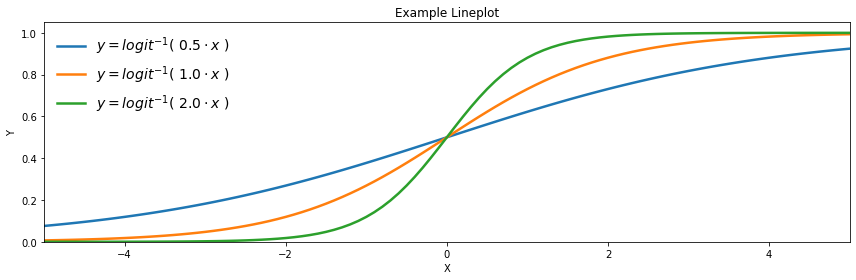

In [124]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(12,4))

## Define sigmoid function.
def inv_logit(arr):
    return 1. / (1 + np.exp(-arr))

## Simulate data.
x = np.linspace(-5,5,101)

## Plot lines.
for b in [0.5,1.0,2.0]:
    ax.plot(x, inv_logit(x * b), lw=2.5, label=r'$y = logit^{-1}( \ %0.1f \cdot x \ )$' %b)

## Add details.
ax.set(xlim=(x.min(), x.max()), xlabel='X', ylim=(0), ylabel='Y', title='Example Lineplot')
ax.legend(loc=2, frameon=False, fontsize=14)

plt.tight_layout()

### Mini-exercise

Divide into three groups. Each group will have 10 minutes to learn about and make an example plot for one of the following graph types:
- barplot
- scatterplot
- histogram
- heatmap
- something Sam hasn't thought of

After 10 minutes, each group will give a mini-demonstration for the other students.

No handles with labels found to put in legend.


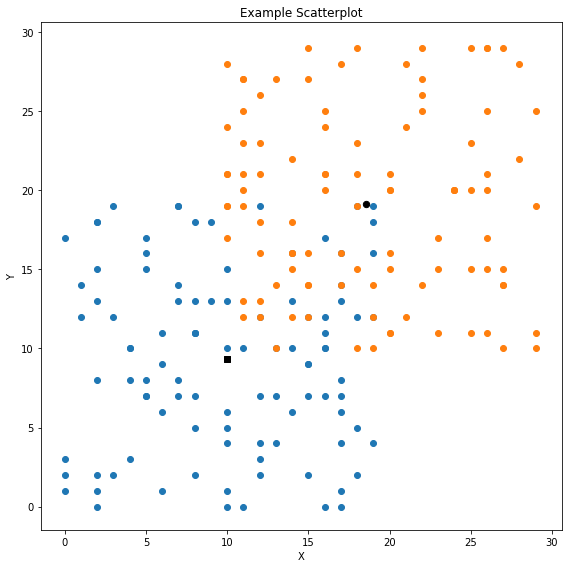

In [145]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

x = np.random.randint(0,20,100)
y = np.random.randint(0,20,100)

x_2 = np.random.randint(10,30,100)
y_2 = np.random.randint(10,30,100)

ax.scatter(x,y)
ax.scatter(x_2,y_2)
ax.scatter(np.mean(x),np.mean(y), s=40, c="k", marker = 's')
ax.scatter(np.mean(x_2),np.mean(y_2), s=40, c="k")

## Add details.
ax.set(xlabel = "X", ylabel = "Y", title='Example Scatterplot')
ax.legend(loc=2, frameon=False, fontsize=14)

plt.tight_layout()

